In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
pd.set_option('display.max_columns', 100)

In [6]:
df_train = pd.read_csv('train.csv')


In [7]:
df_train.shape

(1460, 81)

In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

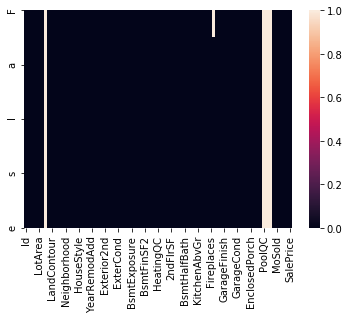

In [9]:
sns.heatmap(df_train.isnull(),yticklabels='False', cbar = 'False')

In [10]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [11]:
var_null_train = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
print(var_null_train)
df_train[var_null_train].isnull().mean()

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


LotFrontage     0.177397
Alley           0.937671
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
FireplaceQu     0.472603
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
PoolQC          0.995205
Fence           0.807534
MiscFeature     0.963014
dtype: float64

In [12]:
df_train.drop(['Alley','MiscFeature','Fence','PoolQC','Id','FireplaceQu'], axis=1, inplace=True)

In [13]:
df_train['MSZoning'].isnull().sum()

0

In [14]:
df_train.shape

(1460, 75)

In [15]:
var_null_train = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
print(var_null_train)
df_train[var_null_train].isnull().mean()

['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond']


LotFrontage     0.177397
MasVnrType      0.005479
MasVnrArea      0.005479
BsmtQual        0.025342
BsmtCond        0.025342
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtFinType2    0.026027
Electrical      0.000685
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
dtype: float64

In [16]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [17]:
cols = df_train.columns

In [18]:
numeric_cols = df_train._get_numeric_data().columns
print(numeric_cols)

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [19]:
categorical_cols = list(set(cols) - set(numeric_cols))
print(categorical_cols)

['MasVnrType', 'ExterQual', 'LotConfig', 'Street', 'HeatingQC', 'BsmtExposure', 'HouseStyle', 'ExterCond', 'Functional', 'MSZoning', 'CentralAir', 'Condition1', 'LandSlope', 'SaleCondition', 'SaleType', 'BsmtQual', 'Utilities', 'Neighborhood', 'GarageQual', 'LandContour', 'KitchenQual', 'RoofMatl', 'RoofStyle', 'BsmtCond', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Condition2', 'BsmtFinType1', 'Heating', 'Foundation', 'GarageFinish', 'LotShape', 'BldgType', 'BsmtFinType2', 'GarageType', 'GarageCond', 'PavedDrive']


In [20]:
df_train[categorical_cols].isnull().mean()

MasVnrType       0.005479
ExterQual        0.000000
LotConfig        0.000000
Street           0.000000
HeatingQC        0.000000
BsmtExposure     0.026027
HouseStyle       0.000000
ExterCond        0.000000
Functional       0.000000
MSZoning         0.000000
CentralAir       0.000000
Condition1       0.000000
LandSlope        0.000000
SaleCondition    0.000000
SaleType         0.000000
BsmtQual         0.025342
Utilities        0.000000
Neighborhood     0.000000
GarageQual       0.055479
LandContour      0.000000
KitchenQual      0.000000
RoofMatl         0.000000
RoofStyle        0.000000
BsmtCond         0.025342
Electrical       0.000685
Exterior1st      0.000000
Exterior2nd      0.000000
Condition2       0.000000
BsmtFinType1     0.025342
Heating          0.000000
Foundation       0.000000
GarageFinish     0.055479
LotShape         0.000000
BldgType         0.000000
BsmtFinType2     0.026027
GarageType       0.055479
GarageCond       0.055479
PavedDrive       0.000000
dtype: float

In [21]:
df_train['GarageType']= df_train['GarageType'].fillna(df_train['GarageType'].mode()[0]) 
df_train['Electrical']= df_train['Electrical'].fillna(df_train['Electrical'].mode()[0])

df_train['GarageCond']= df_train['GarageCond'].fillna(df_train['GarageCond'].mode()[0])
df_train['GarageQual']= df_train['GarageQual'].fillna(df_train['GarageQual'].mode()[0])

df_train['BsmtExposure']= df_train['BsmtExposure'].fillna(df_train['BsmtExposure'].mode()[0])
df_train['BsmtQual']= df_train['BsmtQual'].fillna(df_train['BsmtQual'].mode()[0])
df_train['BsmtFinType1']= df_train['BsmtFinType1'].fillna(df_train['BsmtFinType1'].mode()[0])
df_train['BsmtCond']= df_train['BsmtCond'].fillna(df_train['BsmtCond'].mode()[0])
df_train['BsmtFinType2']= df_train['BsmtFinType2'].fillna(df_train['BsmtFinType2'].mode()[0])

df_train['GarageFinish']= df_train['GarageFinish'].fillna(df_train['GarageFinish'].mode()[0])
df_train['MasVnrType']= df_train['MasVnrType'].fillna(df_train['MasVnrType'].mode()[0])


In [22]:
df_train[categorical_cols].isnull().mean()

MasVnrType       0.0
ExterQual        0.0
LotConfig        0.0
Street           0.0
HeatingQC        0.0
BsmtExposure     0.0
HouseStyle       0.0
ExterCond        0.0
Functional       0.0
MSZoning         0.0
CentralAir       0.0
Condition1       0.0
LandSlope        0.0
SaleCondition    0.0
SaleType         0.0
BsmtQual         0.0
Utilities        0.0
Neighborhood     0.0
GarageQual       0.0
LandContour      0.0
KitchenQual      0.0
RoofMatl         0.0
RoofStyle        0.0
BsmtCond         0.0
Electrical       0.0
Exterior1st      0.0
Exterior2nd      0.0
Condition2       0.0
BsmtFinType1     0.0
Heating          0.0
Foundation       0.0
GarageFinish     0.0
LotShape         0.0
BldgType         0.0
BsmtFinType2     0.0
GarageType       0.0
GarageCond       0.0
PavedDrive       0.0
dtype: float64

In [23]:
df_train[numeric_cols].isnull().mean()

MSSubClass       0.000000
LotFrontage      0.177397
LotArea          0.000000
OverallQual      0.000000
OverallCond      0.000000
YearBuilt        0.000000
YearRemodAdd     0.000000
MasVnrArea       0.005479
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
FullBath         0.000000
HalfBath         0.000000
BedroomAbvGr     0.000000
KitchenAbvGr     0.000000
TotRmsAbvGrd     0.000000
Fireplaces       0.000000
GarageYrBlt      0.055479
GarageCars       0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
PoolArea         0.000000
MiscVal          0.000000
MoSold           0.000000
YrSold           0.000000
SalePrice        0.000000
dtype: float64

In [24]:
df_train['LotFrontage']= df_train['LotFrontage'].fillna(df_train['LotFrontage'].mean()) 
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(df_train['MasVnrArea'].mean())
df_train['GarageYrBlt'] = df_train['GarageYrBlt'].fillna(df_train['GarageYrBlt'].mean())

In [25]:
df_train[numeric_cols].isnull().mean()

MSSubClass       0.0
LotFrontage      0.0
LotArea          0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
MasVnrArea       0.0
BsmtFinSF1       0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath     0.0
BsmtHalfBath     0.0
FullBath         0.0
HalfBath         0.0
BedroomAbvGr     0.0
KitchenAbvGr     0.0
TotRmsAbvGrd     0.0
Fireplaces       0.0
GarageYrBlt      0.0
GarageCars       0.0
GarageArea       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
SalePrice        0.0
dtype: float64

In [26]:
#no more null values in training set
var_null_train = [var for var in df_train.columns if df_train[var].isnull().sum() > 0]
print(var_null_train)
df_train[var_null_train].isnull().mean()

[]


Series([], dtype: float64)

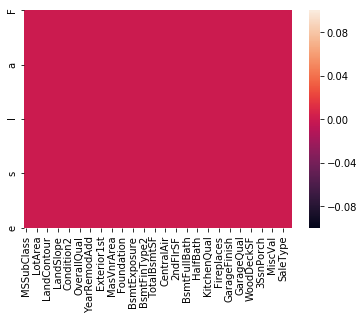

In [27]:
sns.heatmap(df_train.isnull(),yticklabels='False', cbar = 'rainbow')

In [28]:
#catgorical features 

In [29]:
df_train.shape

(1460, 75)

In [30]:
len(categorical_cols)

38

In [31]:
print(categorical_cols)

['MasVnrType', 'ExterQual', 'LotConfig', 'Street', 'HeatingQC', 'BsmtExposure', 'HouseStyle', 'ExterCond', 'Functional', 'MSZoning', 'CentralAir', 'Condition1', 'LandSlope', 'SaleCondition', 'SaleType', 'BsmtQual', 'Utilities', 'Neighborhood', 'GarageQual', 'LandContour', 'KitchenQual', 'RoofMatl', 'RoofStyle', 'BsmtCond', 'Electrical', 'Exterior1st', 'Exterior2nd', 'Condition2', 'BsmtFinType1', 'Heating', 'Foundation', 'GarageFinish', 'LotShape', 'BldgType', 'BsmtFinType2', 'GarageType', 'GarageCond', 'PavedDrive']


In [32]:
def category_onehot_multcols(categorical_cols):
    df_final=final_df
    i=0
    for fields in categorical_cols:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final    

In [33]:
main_df=df_train.copy()


In [34]:
test_df=pd.read_csv('formulatedtest.csv')


In [35]:
test_df.shape


(1459, 74)

In [36]:
#combining train and test data to encode the categories together
final_df = pd.concat([df_train,test_df],axis=0)


C:\Users\sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [37]:
final_df.shape


(2919, 75)

In [38]:
final_df=category_onehot_multcols(categorical_cols)


MasVnrType
ExterQual
LotConfig
Street
HeatingQC
BsmtExposure
HouseStyle
ExterCond
Functional
MSZoning
CentralAir
Condition1
LandSlope
SaleCondition
SaleType
BsmtQual
Utilities
Neighborhood
GarageQual
LandContour
KitchenQual
RoofMatl
RoofStyle
BsmtCond
Electrical
Exterior1st
Exterior2nd
Condition2
BsmtFinType1
Heating
Foundation
GarageFinish
LotShape
BldgType
BsmtFinType2
GarageType
GarageCond
PavedDrive


In [39]:
final_df.shape

(2919, 233)

In [40]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]


In [41]:
df_Train=final_df.iloc[:1460,:]
df_Test=final_df.iloc[1460:,:]


In [ ]:
df_Train.shape

In [ ]:
df_Test

In [ ]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [ ]:
X_train.head()

In [ ]:
y_train.shape

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 174))

# Adding the second hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))

# Adding the third hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))

# Compiling the ANN
classifier.compile(loss= keras.losses.MeanSquaredError(), optimizer='Adamax')

# Fitting the ANN to the Training set
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

In [ ]:
##Prediction and selection algorithm

In [ ]:
import xgboost
classifier=xgboost.XGBRegressor()
regressor=xgboost.XGBRegressor()

In [ ]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [ ]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [ ]:
random_cv.fit(X_train,y_train)


In [ ]:
random_cv.best_estimator_

In [ ]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=None, monotone_constraints='()',
             n_estimators=900, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [ ]:
regressor.fit(X_train,y_train)


In [ ]:
#creating pickle file to save the benchmark model

In [ ]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(classifier, open(filename, 'wb'))


In [ ]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)


In [ ]:
df_Test.shape


In [ ]:
y_pred=regressor.predict(df_Test)


In [ ]:
y_pred


In [ ]:
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('sample_submission_1_Sahil.csv',index=False)

In [ ]:
corr = df_train.corr()

In [ ]:
df_train.shape